# 基础绘图

本章对基本的 Matplotlib 绘图进行介绍，包括点型、线型与多图绘制。

本章加载的库如下所示：

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

以上加载的库中，mpl 一般是不用加载的。本章由于需要介绍全局参数，故需要加载。在使用 Jupyter Notebook 时，我们往往还需要指定图像的输出尺寸，以获得较好的视觉效果：

In [2]:
plt.rcParams['figure.figsize'] = [10, 6]

在本章最后更新时，使用的 Matplotlib 版本是：

In [3]:
mpl.__version__

'3.0.2'

## 基础绘图 

### 通用的 plt.plot()

Matplotlib 的大部分绘图命令都是通过 `plt` 下的功能实现的，而最简单的函数就是 `plt.plot()`。比如一个二次函数图像：

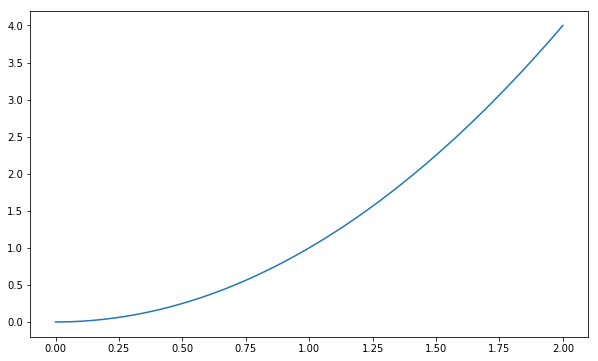

In [4]:
x = np.linspace(0, 2, 100)
y1 = x ** 2

plt.plot(x, y1)
plt.show()  # 记得在最后用 plt.show() 输出图像

从上面也能看出，我们使用 `plt.show()` 函数来输出图像。

我们也可以在一幅图上绘制多个函数，它们会自动以不同的颜色绘制：

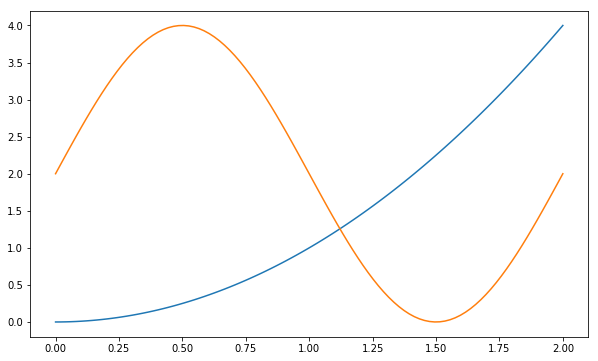

In [5]:
y2 = 2 + 2 * np.sin(np.pi * x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

也就是说，“叠加绘制”默认是开启的——如果有读者使用过 MatLab，那么恭喜你，在 Matplotlib 这里不需要再惦记着什么 hold on 命令了。

如果我们不需要叠加绘制，我们可以随时插入 `plt.close()` 命令，来关闭当前绘制。或者使用 `plt.close('all')` 来清除所有绘制。

### 点型与线型

在有多个曲线时，我们往往通过更改点型或线型来区分它们。尤其是需要黑白打印的场合，线的颜色并不是有效的方案。下面是一个极端的例子：

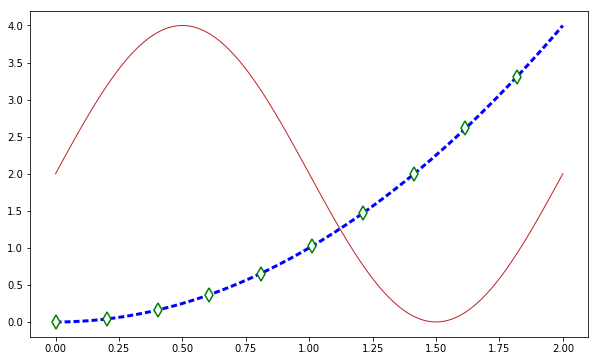

In [6]:
plt.plot(x, y1, color="b", linestyle=":", linewidth=3, dashes=(2,1),  # 线的属性
         marker="d", ms=10, mew=1.5, mec="g", mfc="w",  # 点的属性
         markevery=10)
plt.plot(x, y2, "#bf242a", ls="-", lw=1)
plt.show()

以上的参数的含义分别是：

- color：线的颜色（详细请参考“颜色”一节）。基础的有红r，绿g，蓝b，青c，洋红m，黄y，黑k，白w。以及其他的表述：     
    - HTML 码：例如 `"#66ccff"`
    - 标准化后的 RGB 元组：例如 `(1, 0, 0)`
    - 灰度字串：`"0.5"` 
- linestyle(ls)：线型。实线"-"，虚线"\-\-"，点划线"-."，点线":"。
- dashes: 虚线比例。传入元组 (a,b)，那么划线长与间隔长之比为 a/b。
- linewidth(lw)：线宽。
- marker：点样式。实心"."，像素","，圆点"o"，方块"s"，上折/下折箭头"v"/"^"，左折/右折箭头"<"/">"，五边形"p"，六边形"h"，星"*"，加号"+"，叉号"x"，(瘦)钻石"d/D"，竖线"\|"，横线"_"。
- markevery：每几个点才绘制一个点。
- markersize(ms)：点大小。
- markeredgewidth(mew)：点边缘线宽。
- markeredgecolor(mec)：点边缘颜色。默认与线同色。
- markerfacecolor(mfc)：点填充颜色。默认与线同色。

### 颜色

Matplotlib 的颜色使用是个复杂的话题。通常来说，直接调用的颜色包括：

- 标准化的 RGB：以三元元组的形式，比如 `(0, 0, 1)` 代表 (0, 0, 255)，即纯蓝。
- HTML 16进制颜色码：以字符串的形式，比如 `"#0F0F0F"`。
- 标准化的灰度值：以字符串形式，比如 `0.5` 。
- RGB 与 CMYK 标准色字符：以单个字符形式，有：`r,g,b,c,m,y,k,w` 八种，其中 w 是白色。
- X11/CSS4 标准的颜色名：
- XKCD 颜色调查（参考[此页面](https://xkcd.com/color/rgb/)）：例如"xksd:sky blue"。

以及 matplotlib 采用的色环：

- matplotlib 默认的十色环："C0", "C1", ...,"C9"。这是 matplotlib 绘图默认依次使用的颜色。
- 十色环的另一种形式：'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'。

以上字符串（除16进制码外）均是大小写敏感的。

In [7]:
# A list of X11 color names from: http://cng.seas.rochester.edu/CNG/docs/x11color.html
# Total 140 colors included.
colors = [("LightPink", "#FFB6C1"),("Pink", "#FFC0CB"),("Crimson", "#DC143C"),("LavenderBlush", "#FFF0F5"),
          ("PaleVioletRed", "#DB7093"),("HotPink", "#FF69B4"),("DeepPink", "#FF1493"),("MediumVioletRed", "#C71585"),
          ("Orchid", "#DA70D6"),("Thistle", "#D8BFD8"),("Plum", "#DDA0DD"),("Violet", "#EE82EE"),
          ("Magenta", "#FF00FF"),("Fuchsia", "#FF00FF"),("DarkMagenta", "#8B008B"),("Purple", "#800080"), 
          ("MediumOrchid", "#BA55D3"),("DarkViolet", "#9400D3"),("DarkOrchid", "#9932CC"),("Indigo", "#4B0082"),  
          ("BlueViolet", "#8A2BE2"),("MediumPurple", "#9370DB"),("MediumSlateBlue", "#7B68EE"),("SlateBlue", "#6A5ACD"),
          ("DarkSlateBlue", "#483D8B"),("Lavender", "#E6E6FA"),("GhostWhite", "#F8F8FF"),("Blue", "#0000FF"), 
          ("MediumBlue", "#0000CD"),("MidnightBlue", "#191970"),("DarkBlue", "#00008B"),("Navy", "#000080"), 
          ("RoyalBlue", "#4169E1"),("CornflowerBlue", "#6495ED"),("LightSteelBlue", "#B0C4DE"),("LightSlateGray", "#778899"),
          ("SlateGray", "#708090"),("DodgerBlue", "#1E90FF"),("AliceBlue", "#F0F8FF"),("SteelBlue", "#4682B4"), 
          ("LightSkyBlue", "#87CEFA"),("SkyBlue", "#87CEEB"),("DeepSkyBlue", "#00BFFF"),("LightBlue", "#ADD8E6"), 
          ("PowderBlue", "#B0E0E6"),("CadetBlue", "#5F9EA0"),("Azure", "#F0FFFF"),("LightCyan", "#E0FFFF"), 
          ("PaleTurquoise", "#AFEEEE"),("Cyan", "#00FFFF"),("Aqua", "#00FFFF"),("DarkTurquoise", "#00CED1"), 
          ("DarkSlateGray", "#2F4F4F"),("DarkCyan", "#008B8B"),("Teal", "#008080"),("MediumTurquoise", "#48D1CC"), 
          ("LightSeaGreen", "#20B2AA"),("Turquoise", "#40E0D0"),("Aquamarine", "#7FFFD4"),("MediumAquamarine", "#66CDAA"),   
          ("MediumSpringGreen", "#00FA9A"),("MintCream", "#F5FFFA"),("SpringGreen", "#00FF7F"),("MediumSeaGreen", "#3CB371"),
          ("SeaGreen", "#2E8B57"),("Honeydew", "#F0FFF0"),("LightGreen", "#90EE90"),("PaleGreen", "#98FB98"), 
          ("DarkSeaGreen", "#8FBC8F"),("LimeGreen", "#32CD32"),("Lime", "#00FF00"),("ForestGreen", "#228B22"), 
          ("Green", "#008000"),("DarkGreen", "#006400"),("Chartreuse", "#7FFF00"),("LawnGreen", "#7CFC00"), 
          ("GreenYellow", "#ADFF2F"),("DarkOliveGreen", "#556B2F"),("YellowGreen", "#9ACD32"),("OliveDrab", "#6B8E23"), 
          ("Beige", "#F5F5DC"),("LightGoldenrodYellow", "#FAFAD2"),("Ivory", "#FFFFF0"),("LightYellow", "#FFFFE0"), 
          ("Yellow", "#FFFF00"),("Olive", "#808000"),("DarkKhaki", "#BDB76B"),("LemonChiffon", "#FFFACD"), 
          ("PaleGoldenrod", "#EEE8AA"),("Khaki", "#F0E68C"),("Gold", "#FFD700"),("Cornsilk", "#FFF8DC"), 
          ("Goldenrod", "#DAA520"),("DarkGoldenrod", "#B8860B"),("FloralWhite", "#FFFAF0"),("OldLace", "#FDF5E6"), 
          ("Wheat", "#F5DEB3"),("Moccasin", "#FFE4B5"),("Orange", "#FFA500"),("PapayaWhip", "#FFEFD5"), 
          ("BlanchedAlmond", "#FFEBCD"),("NavajoWhite", "#FFDEAD"),("AntiqueWhite", "#FAEBD7"),("Tan", "#D2B48C"), 
          ("BurlyWood", "#DEB887"),("Bisque", "#FFE4C4"),("DarkOrange", "#FF8C00"),("Linen", "#FAF0E6"), 
          ("Peru", "#CD853F"),("PeachPuff", "#FFDAB9"),("SandyBrown", "#F4A460"),("Chocolate", "#D2691E"), 
          ("SaddleBrown", "#8B4513"),("Seashell", "#FFF5EE"),("Sienna", "#A0522D"),("LightSalmon", "#FFA07A"), 
          ("Coral", "#FF7F50"),("OrangeRed", "#FF4500"),("DarkSalmon", "#E9967A"),("Tomato", "#FF6347"), 
          ("MistyRose", "#FFE4E1"),("Salmon", "#FA8072"),("Snow", "#FFFAFA"),("LightCoral", "#F08080"), 
          ("RosyBrown", "#BC8F8F"),("IndianRed", "#CD5C5C"),("Red", "#FF0000"),("Brown", "#A52A2A"), 
          ("FireBrick", "#B22222"),("DarkRed", "#8B0000"),("Maroon", "#800000"),("White", "#FFFFFF"), 
          ("WhiteSmoke", "#F5F5F5"),("Gainsboro", "#DCDCDC"),("LightGrey", "#D3D3D3"),("Silver", "#C0C0C0"), 
          ("DarkGray", "#A9A9A9"),("Gray", "#808080"),("DimGray", "#696969"),("Black", "#000000")]

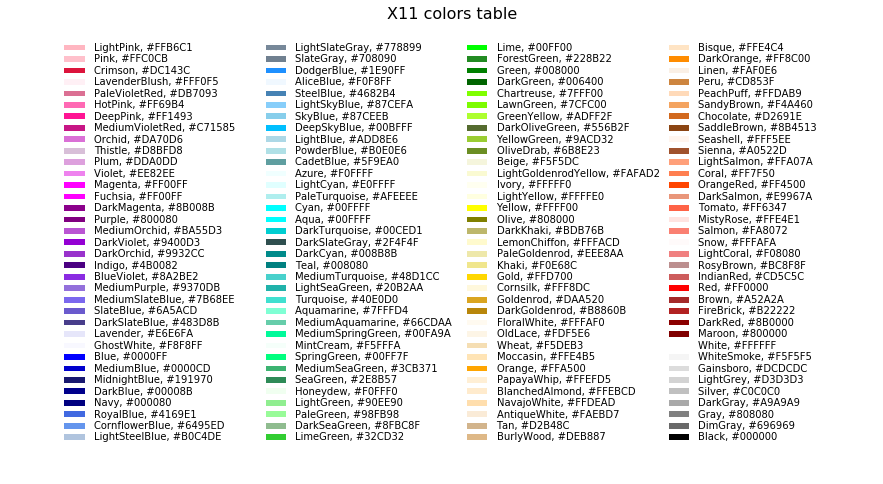

In [8]:
plt.close("all")
f, ax = plt.subplots(figsize=(15, 8))
w, h = 10, 4
rowpad, colpad = 2, 9 
for i in range(140):
    # 定义 colors 的代码块被隐藏了，读者可以打开源 ipynb 文件查看
    curname = colors[i][0]  
    cols, rows = divmod(i, 35)
    rows = 34 - rows
    ax.fill_between([w * cols, w * (cols + 1) - colpad],
                    [h * rows, h * rows], 
                    [h * (rows + 1) - rowpad, h * (rows + 1) - rowpad],
                    facecolor=curname)
    ax.text(w * (cols + 1) - 0.95*colpad, h * rows + (h - rowpad) / 2, "{}, {}".format(*colors[i]), 
            horizontalalignment="left", verticalalignment='center')
ax.axis(xmax=4*w)
ax.set_axis_off()
ax.set_title("X11 colors table", fontsize=16)
    
plt.show()